## AB Tests

### 1. Оценка результатов AB теста

В данном задании вам требуется оценить результаты AB теста. Даны результаты на контрольной и тестовой группе после проведения AB теста.
Помимо показателей целевой переменной, вам даны также несколько фичей, которые являются характеристиками объектов. Даны целевые показатели (y) и принадлежность к целевой группе (W).

</u>Задача:</u>
1. Проверьте подходящую для данных гипотезу о равенстве средних в выборках
2. Каков treatment effect нашего воздействия? (ATE) 
3. Примените известные вам методы оценки ATE с учетом особенностей данных.
4. Проанализируйте, сравните результаты применения различных методов.
5. В явном виде выпишите выводы.

</i>Примечание: предположения о рандомизированном эксперименте нуждаются в проверке - независимость treatment от объектов не гарантирована. Все предположения выписывайте явно.</i> 

Для данной задачи используется dataset:  dataset_part1_students.csv

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [24]:
pd.__version__

'1.0.5'

In [2]:
df = pd.read_csv('student_data/dataset_part1_students.csv', sep='\t')

In [136]:
df.head()

,y,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,-1.459404,0.0,0.986277,0.873392,0.509746,0.271836,0.336919,0.216954,0.276477,0.343316,0.862159,0.156700
1,-1.694174,0.0,0.140887,0.757080,0.736325,0.355663,0.341093,0.666803,0.217101,0.561427,0.124179,0.319736
2,5.378374,0.0,0.953214,0.137357,0.569413,0.975665,0.503367,0.667664,0.034191,0.456119,0.155851,0.476049
3,2.188189,1.0,0.169702,0.896258,0.373394,0.379693,0.858317,0.646061,0.583462,0.668350,0.177793,0.849248
4,2.862696,1.0,0.442373,0.831468,0.763921,0.919691,0.070573,0.156165,0.636894,0.555696,0.191929,0.425656


In [137]:
A = df[df['W']==1]
B = df[df['W']==0]

In [6]:
stats.ttest_ind(A.y.values, B.y.values)

Ttest_indResult(statistic=9.332400850259313, pvalue=1.1400916649505329e-20)

гипотеза о равенстве средних в выборках отвергается

#### treatment effect (ATE)

In [7]:
treatment_effect = A.y.values.mean() - B.y.values.mean()
treatment_effect

0.40010310554442663

In [8]:
delta_err  = 1.96 * np.sqrt(
        A.y.values.var() / A.y.values.shape[0] + 
        B.y.values.var() / B.y.values.shape[0])
delta_err

0.08402396031180587

#### treatment effect (ATE) с учётом особенностей данных

In [9]:
import econml

In [7]:
from causalml.inference import meta

In [8]:
from causalinference import CausalModel

In [13]:
k2,p = stats.normaltest(df)

In [14]:
p[0] #отклонение от нормалного распределения

0.5952637697871511

In [15]:
X = df.drop(['W', 'y'], axis=1)

In [24]:
df['y'].values

array([-1.45940437, -1.69417388,  5.37837364, ...,  2.56938641,
        0.96418384, -1.43338596])

In [25]:
X.values

array([[0.98627683, 0.87339195, 0.50974552, ..., 0.34331559, 0.86215894,
        0.15669967],
       [0.14088724, 0.75708028, 0.73632492, ..., 0.56142698, 0.12417878,
        0.31973648],
       [0.95321387, 0.13735679, 0.5694131 , ..., 0.45611937, 0.15585136,
        0.47604897],
       ...,
       [0.05875441, 0.93248915, 0.53724573, ..., 0.44024325, 0.3499118 ,
        0.80608489],
       [0.63966306, 0.29187749, 0.11129211, ..., 0.33129636, 0.78293707,
        0.00524632],
       [0.13517287, 0.76663239, 0.57777096, ..., 0.98220922, 0.67238896,
        0.11684441]])

In [27]:
cm = CausalModel(
    Y=df['y'].values, 
    D=df['W'].values, 
    X=X.values)

cm.est_via_ols(adj=1)

OLS = cm.estimates

print(cm.estimates) #линейная регрессия


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610



`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [29]:
cm = CausalModel(
    Y=df['y'].values, 
    D=df['W'].values,
    X=X.values)

cm.est_via_matching()

Matching = cm.estimates

print(cm.estimates) #оценка соответствия


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.478      0.076      6.266      0.000      0.329      0.628
           ATC      0.388      0.090      4.330      0.000      0.212      0.563
           ATT      0.561      0.090      6.247      0.000      0.385      0.737



In [30]:
cm = CausalModel(
    Y=df['y'].values, 
    D=df['W'].values,
    X=X.values)

cm.est_propensity_s()
cm.trim_s()
cm.est_via_matching()

Matching_PS = cm.estimates

print(cm.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.499      0.079      6.302      0.000      0.344      0.654
           ATC      0.408      0.090      4.516      0.000      0.231      0.585
           ATT      0.568      0.092      6.160      0.000      0.387      0.749



In [31]:
cm = CausalModel(
    Y=df['y'].values, 
    D=df['W'].values, 
    X=X.values)

cm.est_propensity_s()
cm.stratify_s()
cm.est_via_blocking()

Blocking = cm.estimates

print(cm.estimates)


Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.515      0.056      9.264      0.000      0.406      0.624
           ATC      0.412      0.066      6.215      0.000      0.282      0.542
           ATT      0.609      0.066      9.195      0.000      0.479      0.739



In [33]:
print(OLS)
print(Matching)
print(Matching_PS)
print(Blocking)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.478      0.076      6.266      0.000      0.329      0.628
           ATC      0.388      0.090      4.330      0.000      0.212      0.563
           ATT      0.561      0.090      6.247      0.000      0.385      0.737


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.499      0.079      6.302      0.000      0.344      0

In [38]:
ate_dict = dict()

In [39]:
ate_dict['ols'] = OLS['ols']
ate_dict['Matching'] = Matching['matching']
ate_dict['Matching_PS'] = Matching_PS['matching']
ate_dict['Blocking'] = Blocking['blocking']

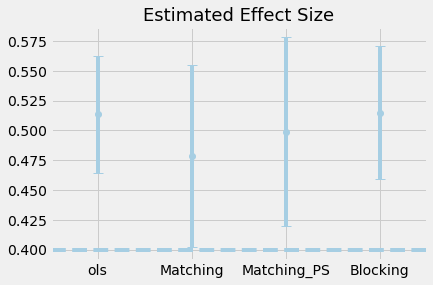

In [51]:
y = []
yerr = []
x_label = []

for method, result in ate_dict.items():
    y.append(result["ate"])
    yerr.append(result["ate_se"])
    x_label.append(method)
    
x = np.arange(len(y))

plt.errorbar(x=x, y=y, yerr=yerr, linestyle="none", capsize=5, marker="o")
plt.xticks(x, x_label)
plt.title("Estimated Effect Size", fontsize=18)
plt.hlines(treatment_effect, -0.5, 3.5, linestyles="dashed")
plt.xlim(-0.5, 3.5);

#### Выводы

In [43]:
treatment_effect

0.40010310554442663

In [44]:
ate_dict['Blocking']['ate'] #не попадает в диапазон

0.5149968969402047

In [45]:
ate_dict['Matching']['ate']

0.47831269594853837

In [46]:
ate_dict['Matching_PS']['ate']

0.4988233893103572

In [47]:
ate_dict['ols']['ate']#не попадает в диапазон

0.5133854882565579

In [48]:
print(treatment_effect - ate_dict['Blocking']['ate'])
print(treatment_effect - ate_dict['Matching']['ate'])  #наименьшее отклонение
print(treatment_effect - ate_dict['Matching_PS']['ate'])
print(treatment_effect - ate_dict['ols']['ate'])

-0.11489379139577804
-0.07820959040411174
-0.09872028376593056
-0.11328238271213131


Версия B выигрывает

### 2. Оценка результатов AB теста с показателями до начала эксперимента

Необходимо как и ранее оценить результаты AB теста, а именно ATE. Вы располагаете результатами до и после проведения теста (y_0 и y_1), а также вам дан treatment assignment (W). 

Необходимо: 
1. Проверить все требуемые гипотезы
2. Оценить ATE подходящим для этого случая методом (примените несколько методов)
3. Сравнить и проанализировать результаты оценок
4. Явно выписать выводы.

Как и прежде, все предположения должны быть указаны. Визуализация результатов приветствуется.

dataset_part2_students.csv

In [53]:
df2 = pd.read_csv('student_data/dataset_part2_students.csv', sep='\t')

In [54]:
df2.head()

,y_1,y_0,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,5.887156,2.785060,1.0,0.605978,0.733369,0.138947,0.312673,0.997243,0.128162,0.178993,0.752925,0.662161,0.784310
1,2.232601,5.533515,0.0,0.096894,0.058571,0.962396,0.616557,0.086630,0.561272,0.616525,0.963843,0.574304,0.371161
2,0.144419,0.095546,1.0,0.452145,0.201850,0.569305,0.195096,0.583704,0.476313,0.517814,0.823099,0.732225,0.069056
3,-2.446425,3.590472,1.0,0.672129,0.643485,0.828014,0.204469,0.617489,0.617701,0.301069,0.871741,0.589654,0.981770
4,2.163090,1.365405,0.0,0.442232,0.126318,0.508831,0.431786,0.915940,0.709016,0.890655,0.588886,0.636830,0.342209


In [58]:
y = df2['y_1'] - df2['y_0']

In [59]:
df2['y'] = y

In [60]:
k2,p = stats.normaltest(df2)

In [61]:
p[0]

0.3192826657450293

гипотеза принимается

In [64]:
A1 = df2[df2['W'] == 1]
B1 = df2[df2['W'] == 0]

In [68]:
y_A1 = A1['y']
y_B0 = B1['y']

In [69]:
treatment_effect_2 = y_A1.mean() - y_B0.mean()
treatment_effect_2

0.5549047702971166

In [72]:
stats.fligner(y_A1, y_B0)

FlignerResult(statistic=0.0003912182699424198, pvalue=0.9842194800359902)

гипотеза о равенстве дисперсий принимается

In [73]:
stats.ttest_ind(y_A1, y_B0)

Ttest_indResult(statistic=9.118025905018952, pvalue=9.12276266827303e-20)

гипотеза отвергается

In [74]:
stats.shapiro(df2)

p-value may not be accurate for N > 5000.


(0.7302572727203369, 0.0)

гипотеза отвергается

In [75]:
stats.mannwhitneyu(y_A1, y_B0)

MannwhitneyuResult(statistic=11245141.0, pvalue=9.177359384779589e-18)

гипотеза отвергается, так как отклонение от нормальности несущественно

In [77]:
X2 = df2.drop(['W', 'y_0', 'y_1', 'y'], axis = 1)

In [79]:
cmd = CausalModel(
    Y=df2['y'].values, 
    D=df2['W'].values, 
    X=X2.values)

cmd.est_via_ols(adj=1)

OLS = cm.estimates

print(cmd.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.543      0.070      7.773      0.000      0.406      0.679



`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [81]:
cmd = CausalModel(
    Y=df2['y'].values, 
    D=df2['W'].values, 
    X=X2.values)

cmd.est_via_matching()

Matching = cmd.estimates

print(cmd.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.570      0.109      5.225      0.000      0.356      0.784
           ATC      0.484      0.128      3.798      0.000      0.234      0.734
           ATT      0.649      0.128      5.065      0.000      0.398      0.900



In [82]:
cmd = CausalModel(
    Y=df2['y'].values, 
    D=df2['W'].values, 
    X=X2.values)

cmd.est_propensity_s()
cmd.trim_s()
cmd.est_via_matching()

Matching_PS = cmd.estimates

print(cmd.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.622      0.114      5.473      0.000      0.399      0.844
           ATC      0.565      0.130      4.328      0.000      0.309      0.820
           ATT      0.664      0.131      5.064      0.000      0.407      0.922



In [83]:
cmd = CausalModel(
    Y=df2['y'].values, 
    D=df2['W'].values, 
    X=X2.values)

cmd.est_propensity_s()
cmd.stratify_s()
cmd.est_via_blocking()

Blocking = cmd.estimates

print(cmd.estimates)


Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.530      0.078      6.756      0.000      0.376      0.684
           ATC      0.437      0.096      4.547      0.000      0.249      0.626
           ATT      0.614      0.091      6.779      0.000      0.436      0.791



`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [84]:
treatment_effect_2#попадает в диапазоны всех методов

0.5549047702971166

In [85]:
OLS['blocking']['ate']

0.5149968969402047

In [86]:
Matching['matching']['ate']

0.5704647920177232

In [87]:
Matching_PS['matching']['ate']

0.6216427227265936

In [88]:
Blocking['blocking']['ate']

0.5299575154042293

In [89]:
print(treatment_effect_2 - OLS['blocking']['ate'])
print(treatment_effect_2 - Matching['matching']['ate'])#наименьшее отклонение
print(treatment_effect_2 - Matching_PS['matching']['ate'])
print(treatment_effect_2 - Blocking['blocking']['ate'])

0.03990787335691193
-0.015560021720606554
-0.066737952429477
0.024947254892887294


B выигрывает

### 3. Построение uplift модели по результатам AB теста.

Вам даны результаты AB теста для модели конверсии клиента в продукте (conversion). Конверсия может принимать значения 1 или 0, что значит - клиент подключил услугу, либо не подключил соответственно.

Задача:
1. Оцените ATE по данным.
2. Оцените CATE для каждого наблюдения.
3. Проставьте рекомендации к воздействию на каждый объект.
4. Какая ожидаемая конверсия при оптимальном воздействии?
5. Все выводы, предпосылки и методы представляйте в явном виде в ноутбуке.

Визуализация результатов также будет приветствоваться.

dataset_part3_students.csv

In [92]:
df3 = pd.read_csv('student_data/dataset_part3_students.csv', sep='\t')

In [94]:
df3.head()

,treatment,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,conversion
0,control,0.034351,0.550725,-1.348524,-0.029591,0.499535,-0.412464,0.933588,-0.522954,-0.029591,...,-0.314573,-0.879456,0.640264,1.165722,0.570495,0.529443,0.227962,1.929914,0.798664,0
1,control,-1.059404,0.299404,0.220273,-1.569660,1.084204,-2.167118,1.216469,-0.744547,-1.569660,...,0.303664,1.080643,2.646483,-0.329690,1.725636,1.434649,-2.064893,0.188000,-1.134651,0
2,control,0.051934,2.338729,-0.341017,-1.099362,0.693090,-2.424267,1.572066,-0.212798,-1.099362,...,-0.083721,-1.981712,0.224777,2.038004,2.516398,2.324280,-3.182196,-0.888490,-1.402561,0
3,treatment,0.667770,0.539316,0.468719,-0.840885,-0.708331,0.126634,1.275854,-0.954919,-0.840885,...,-0.752011,-0.347319,-1.659402,-0.871980,-0.893513,-0.658078,-2.704997,-0.390745,-1.578004,1
4,control,-1.416158,2.486628,0.496402,-1.174618,2.738267,-4.756755,-0.180918,-1.281432,-1.174618,...,-1.198151,-0.232961,0.948875,1.210523,1.536723,1.548610,-0.926435,0.972459,-0.711251,0


In [96]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [97]:
X3 = df3.drop(['treatment', 'conversion'], axis=1)

S-Learner 

In [100]:
learner_s = LRSRegressor(control_name='control')
ate_s = learner_s.estimate_ate(X = X3.values,
                               treatment=df3['treatment'].values, 
                               y=df3['conversion'].values)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

(array([0.05978375]), array([0.05692736]), array([0.06264014]))
ATE estimate: 0.060
ATE lower bound: 0.057
ATE upper bound: 0.063


In [101]:
learner_s = LRSRegressor(control_name='treatment')
ate_s = learner_s.estimate_ate(X = X3.values,
                               treatment=df3['treatment'].values, 
                               y=df3['conversion'].values)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

(array([-0.060792]), array([-0.06352001]), array([-0.05806398]))
ATE estimate: -0.061
ATE lower bound: -0.064
ATE upper bound: -0.058


T-Learner

In [103]:
learner_t = BaseTRegressor(learner=LinearRegression(), control_name='control')
ate_t = learner_t.estimate_ate(X = X3.values,
                               treatment=df3['treatment'].values, 
                               y=df3['conversion'].values)
print('\nUsing the BaseTRegressor class and using Linear Regression (different result):')
print(ate_t)


Using the BaseTRegressor class and using Linear Regression (different result):
(array([0.06073288]), array([0.05812061]), array([0.06334515]))


X Learner without propensity score input

In [105]:
# Calling the Base Learner class and feeding in XGB
learner_x = BaseXRegressor(XGBRegressor(), control_name='control')
ate_x = learner_x.estimate_ate(X = X3.values,
                               treatment=df3['treatment'].values, 
                               y=df3['conversion'].values)
print('Using the BaseXRegressor class and using XGB without propensity score input:')
print(ate_x)

# Calling the Base Learner class and feeding in LinearRegression
learner_x = BaseXRegressor(learner=LinearRegression(), control_name='control')
ate_x = learner_x.estimate_ate(X = X3.values,
                               treatment=df3['treatment'].values, 
                               y=df3['conversion'].values)
print('\nUsing the BaseXRegressor class and using Linear Regression without propensity score input:')
print(ate_x)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


Using the BaseXRegressor class and using XGB without propensity score input:
(array([0.05922771]), array([0.05736434]), array([0.06109109]))


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge



Using the BaseXRegressor class and using Linear Regression without propensity score input:
(array([0.06072406]), array([0.05811175]), array([0.06333637]))


R Learner without propensity score input

In [107]:
# Calling the Base Learner class and feeding in LinearRegression
learner_r = BaseRRegressor(learner=LinearRegression(), control_name='control')
ate_r = learner_r.estimate_ate(X = X3.values,
                               treatment=df3['treatment'].values, 
                               y=df3['conversion'].values)
print('Using the BaseRRegressor class and using Linear Regression without propensity score input:')
print(ate_r)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


Using the BaseRRegressor class and using Linear Regression without propensity score input:
(array([0.06043982]), array([0.06043352]), array([0.06044612]))


In [108]:
print('ATE estimate: {:.03f}'.format(ate_r[0][0]))

ATE estimate: 0.060


#### CATE

In [109]:
# S Learner
learner_s = LRSRegressor(control_name='treatment')
cate_s = learner_s.fit_predict(X = X3.values,
                               treatment=df3['treatment'].values, 
                               y=df3['conversion'].values)

In [111]:
# S Learner
learner_s = LRSRegressor(control_name='control')
cate_s = learner_s.fit_predict(X = X3.values,
                               treatment=df3['treatment'].values, 
                               y=df3['conversion'].values)

In [112]:
# T Learner
learner_t = BaseTRegressor(learner=XGBRegressor(), control_name='control')
cate_t = learner_t.fit_predict(X = X3.values,
                               treatment=df3['treatment'].values, 
                               y=df3['conversion'].values)

In [113]:
# X Learner without propensity score input
learner_x_no_p = BaseXRegressor(learner=XGBRegressor(), control_name='control')
cate_x_no_p = learner_x_no_p.fit_predict(X = X3.values,
                                         treatment=df3['treatment'].values,
                                         y=df3['conversion'].values)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


In [116]:
# R Learner without propensity score input
learner_r_no_p = BaseRRegressor(learner=XGBRegressor(), control_name='control')
cate_r_no_p = learner_r_no_p.fit_predict(X = X3.values,
                                         treatment=df3['treatment'].values,
                                         y=df3['conversion'].values)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


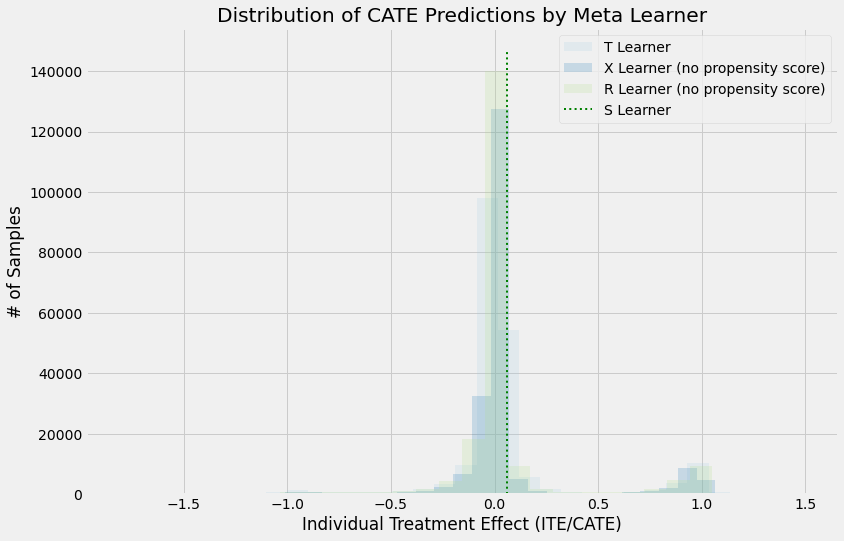

In [117]:
alpha=0.2
bins=30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner')
plt.hist(cate_x_no_p, alpha=alpha, bins=bins, label='X Learner (no propensity score)')
plt.hist(cate_r_no_p, alpha=alpha, bins=bins, label='R Learner (no propensity score)')
plt.vlines(cate_s[0], 0, plt.axes().get_ylim()[1], label='S Learner',
           linestyles='dotted', colors='green', linewidth=2)
plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

C extension was not built during install!


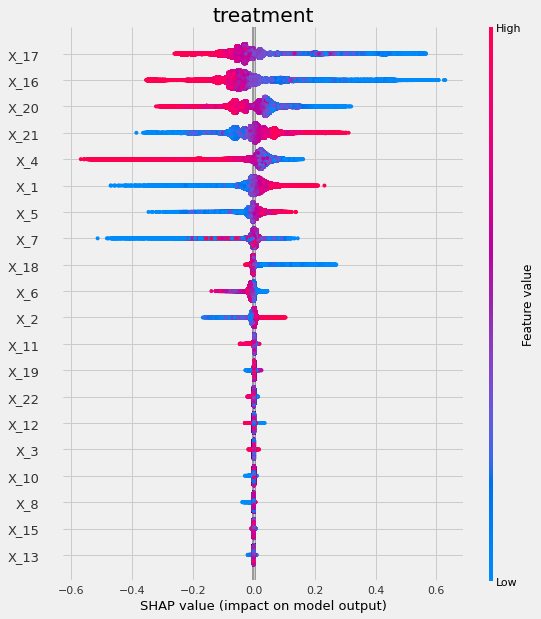

In [118]:
learner_r_no_p.plot_shap_values(X = X3.values,
                                features=X3.columns,
                                tau = cate_r_no_p)